In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

In [2]:
seq_len = 24

no, dim = 10000, 5
ori_data = sine_data_generation(no, seq_len, dim)
    
print('dataset is ready.')

dataset is ready.


In [3]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 10000
parameters['batch_size'] = 128

In [4]:
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset





Start Embedding Network Training
step : 0/10000, s_loss :0.0676
step : 1000/10000, s_loss :0.0071
step : 2000/10000, s_loss :0.0053
step : 3000/10000, s_loss :0.0035
step : 4000/10000, s_loss :0.0027
step : 5000/10000, s_loss :0.002
step : 6000/10000, s_loss :0.0018
step : 7000/10000, s_loss :0.0016
step : 8000/10000, s_loss :0.0014
step : 9000/10000, s_loss :0.0012
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10000, d_loss: 2.2417, g_loss_u: 0.5784, g_loss_s: 0.0244, g_loss_v: 0.4039, e_loss_t0: 0.3204
step: 1000/10000, d_loss: 1.5719, g_loss_u: 1.1486, g_loss_s: 0.0248, g_loss_v: 0.0497, e_loss_t0: 0.022
step: 2000/10000, d_loss: 1.5573, g_loss_u: 1.3639, g_loss_s: 0.0219, g_loss_v: 0.0372, e_loss_t0: 0.0138


step: 3000/10000, d_loss: 1.3859, g_loss_u: 1.6987, g_loss_s: 0.0186, g_loss_v: 0.046, e_loss_t0: 0.0108
step: 4000/10000, d_loss: 1.4822, g_loss_u: 1.1952, g_loss_s: 0.02, g_loss_v: 0.0547, e_loss_t0: 0.0086
step: 5000/10000, d_loss: 1.5606, g_loss_u: 1.766, g_loss_s: 0.0167, g_loss_v: 0.0421, e_loss_t0: 0.0078
step: 6000/10000, d_loss: 1.5925, g_loss_u: 1.2299, g_loss_s: 0.0183, g_loss_v: 0.0478, e_loss_t0: 0.007
step: 7000/10000, d_loss: 1.4393, g_loss_u: 1.2009, g_loss_s: 0.0161, g_loss_v: 0.0448, e_loss_t0: 0.0065
step: 8000/10000, d_loss: 1.6379, g_loss_u: 1.1698, g_loss_s: 0.0171, g_loss_v: 0.0565, e_loss_t0: 0.0061
step: 9000/10000, d_loss: 1.4535, g_loss_u: 1.5726, g_loss_s: 0.0165, g_loss_v: 0.0335, e_loss_t0: 0.0061
Finish Joint Training
Finish Synthetic Data Generation


In [5]:
metric_iteration = 5

discriminative_score = list()

for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.


Discriminative score: 0.0555


In [6]:
predictive_score = list()

for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

Predictive score: 0.1058


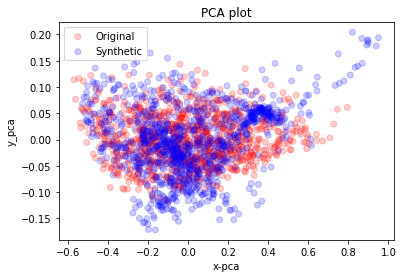

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.137s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.023636
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.188904
[t-SNE] KL divergence after 300 iterations: 0.822372


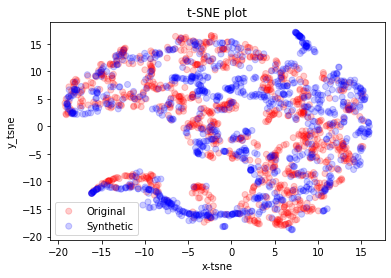

In [7]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')